In [1]:
import numpy as np
import pandas as pd
import interpret

from interpret.glassbox import ExplainableBoostingClassifier as ebc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as auc
from interpret import show

from interpret.visual.plot import plot_bar
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib
matplotlib.rcParams.update({'font.size': 24})

In [2]:
data_dir = "/Users/blengerich/Dropbox/Professional/Research/Data/Caruana/Pneumonia"
feat_names_df = pd.read_csv("{}/RaniHasPneumonia/featureNames.txt".format(data_dir), sep='\t', header=None)
feat_names = feat_names_df[1].values

# Pre-specified train/test split to limit overfitting.
train_df = pd.read_csv("{}/RaniHasPneumonia/medis9847c.data".format(data_dir), sep='\t', header=None)
train_df = train_df.drop(train_df.columns[47], axis=1) # Drop the target.
train_df.columns = feat_names

test_df = pd.read_csv("{}/RaniHasPneumonia/medis9847c.test".format(data_dir), sep='\t', header=None)
test_df = test_df.drop(test_df.columns[47], axis=1)
test_df.columns = feat_names

In [3]:
df = pd.concat([train_df, test_df])
Y = df['outcome (0=lines, 1=dies)']
X = df.copy()
X = df.drop('outcome (0=lines, 1=dies)', axis=1)
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

(14199, 46)


In [4]:
# Build and fit a high-fidelity additive model.
ebm = ebc(outer_bags=100, interactions=0, max_bins=256, inner_bags=10)
ebm.fit(X, Y)
ebm_global = ebm.explain_global()

In [5]:
print(auc(Y_train, ebm.predict_proba(X_train)[:, 1]))
print(auc(Y_test,  ebm.predict_proba(X_test)[:, 1]))

0.8643791813021444
0.8696859856046708


In [6]:
# Inspect what the model has learned with interactive plots.
show(ebm_global)

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/interpret/visual/udash.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/interpret/visual/udash.py:6: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/Users/blengerich/Library/Python/3.7/lib/python/site-packages/interpret/visual/udash.py:7: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`



<!-- http://127.0.0.1:7001/4812050960/ -->

Feature: age is not observed as a Boolean variable.
Feature: number_of_diseases is not observed as a Boolean variable.
Feature: re-admission_to_hospital is not observed as a Boolean variable.
Feature: heart_rate is not observed as a Boolean variable.
Feature: respiration_rate is not observed as a Boolean variable.
Feature: systolic_blood_pressure is not observed as a Boolean variable.
Feature: temperature is not observed as a Boolean variable.
Feature: albumin_level is not observed as a Boolean variable.
Feature: percentage_bands is not observed as a Boolean variable.
Feature: BUN_level is not observed as a Boolean variable.
Feature: creatinine_level is not observed as a Boolean variable.
Feature: glucose_level is not observed as a Boolean variable.
Feature: hematocrit is not observed as a Boolean variable.
Feature: potassium_level is not observed as a Boolean variable.
Feature: sodium_level is not observed as a Boolean variable.
Feature: pH is not observed as a Boolean variable.
Featu

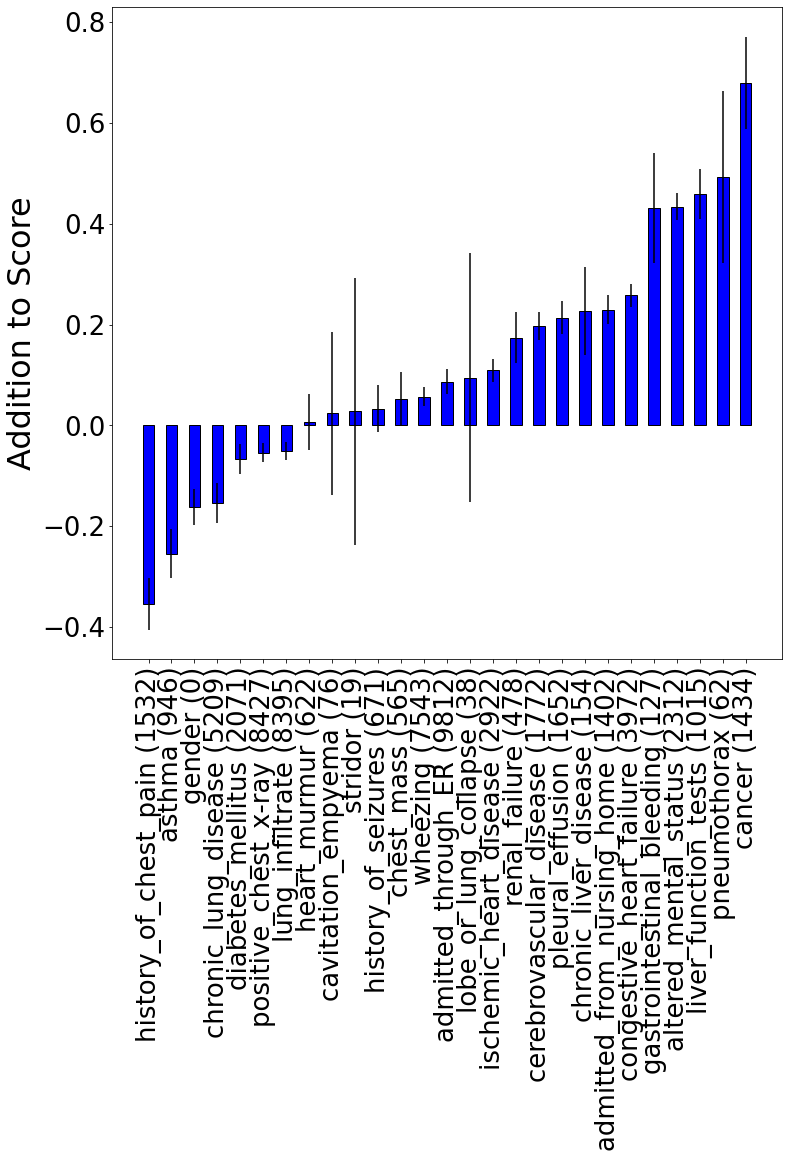

In [12]:
import ebm_utils
from ebm_utils import plot_utils

# Helper functions for pretty plotting available from:
# https://github.com/blengerich/ebm_utils

ebm_utils.plot_utils.plot_all_bools(feat_names, ebm_global, mpl_style=True,
    figname=None, figsize=(12, 12), min_samples=None, ticksize=26)